# Experiment 5 - Ephemerality in complex games

In [ ]:
! tar czf Experiments.tar *

In [ ]:
! nvidia-smi

In [2]:
import pickle
import random

In [2]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

# Notebook variables

In [ ]:
exp_number = 5
games_folder = "../Games"
seeds = range(1,51)
n_episodes = 1
max_steps = 100

In [4]:
with open(f"./Experiment 1/max_scores.pickle", "rb") as f:
    max_scores_simple = pickle.load(f)
    print("Data loaded.")

max_scores_simple = max_scores_simple[:len(seeds)]
max_score_cooking = 5

Data loaded.


# Game running

In [5]:
n_think_indices = [4, 10]
n_episodes = 1
max_steps = 100

### 0 and e1

In [ ]:
# these are not needed
game = "simple"

results_all_seeds = []
for seed in seeds:
    results = play(LLMAgentSelfEvaluate(selfeval_turns=0,
                                        verbose=False,
                                        log=f"./Experiment {exp_number}/logs/{game}/0think-seed{seed}.log"
                                        ),
                    f"{games_folder}/{game}/seed{seed}.z8",
                    max_steps=max_steps,
                    n_episodes=n_episodes)
    results_all_seeds.append(results[0]) # only one episode
with open(f"./Experiment {exp_number}/0think_{game}.pickle", "wb") as f:
    pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
    print("Data pickled.")

results_all_seeds = []
for seed in seeds:
    results = play(LLMAgentSelfEvaluate(selfeval_turns=1,
                                        reads_own_reasoning=False,
                                        verbose=False,
                                        log=f"./Experiment {exp_number}/logs/{game}/e1think-seed{seed}.log"
                                        ),
                    f"{games_folder}/{game}/seed{seed}.z8",
                    max_steps=max_steps,
                    n_episodes=n_episodes)
    results_all_seeds.append(results[0]) # only one episode
with open(f"./Experiment {exp_number}/e1think_{game}.pickle", "wb") as f:
    pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
    print("Data pickled.")

In [ ]:
game = "cooking"

results_all_seeds = []
for seed in seeds:
    results = play(LLMAgentSelfEvaluate(selfeval_turns=0,
                                        verbose=False,
                                        log=f"./Experiment {exp_number}/logs/{game}/0think-level1-seed{seed}.log"
                                        ),
                    f"{games_folder}/{game}/level1-seed{seed}.z8",
                    max_steps=max_steps,
                    n_episodes=n_episodes)
    results_all_seeds.append(results[0]) # only one episode
with open(f"./Experiment {exp_number}/0think_{game}.pickle", "wb") as f:
    pickle.dump(results_all_seeds, f)
    print("Data pickled.")

results_all_seeds = []
for seed in seeds:
    results = play(LLMAgentSelfEvaluate(selfeval_turns=1,
                                        reads_own_reasoning=False,
                                        verbose=False,
                                        log=f"./Experiment {exp_number}/logs/{game}/e1think-level1-seed{seed}.log"
                                        ),
                    f"{games_folder}/{game}/level1-seed{seed}.z8",
                    max_steps=max_steps,
                    n_episodes=n_episodes)
    results_all_seeds.append(results[0]) # only one episode
with open(f"./Experiment {exp_number}/e1think_{game}.pickle", "wb") as f:
    pickle.dump(results_all_seeds, f)
    print("Data pickled.")

games/cooking/level1-seed1.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 5; total execution time: 31 s.
games/cooking/level1-seed2.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 31 s.
games/cooking/level1-seed3.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 30 s.
games/cooking/level1-seed4.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 31 s.
games/cooking/level1-seed5.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 28 s.
games/cooking/level1-seed6.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 33 s.
games/cooking/level1-seed7.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 35 s.
games/cooking/level1-seed8.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 30 s.
games/cooking/level1-seed9.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 32 s.
games/cooking/level1-seed10.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 

### The others

In [ ]:
game = "simple"

for n in n_think_indices:
    for ephemeral in [False, True]:
        results_all_seeds = []
        for seed in seeds:
            results = play(LLMAgentSelfEvaluate(selfeval_turns=n,
                                                reads_own_reasoning=ephemeral,
                                                random_selfeval=True,
                                                verbose=False,
                                                log=f"./Experiment {exp_number}/logs/{game}/{'e' if ephemeral else ''}r{n}think-seed{seed}.log"
                                                ),
                            f"{games_folder}/{game}/seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
            results_all_seeds.append(results[0]) # only one episode
        with open(f"./Experiment {exp_number}/{'e' if ephemeral else ''}r{n}think_{game}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f)
            print("Data pickled.")

In [ ]:
game = "cooking"

for n in n_think_indices:
    for ephemeral in [False, True]:
        results_all_seeds = []
        for seed in seeds:
            results = play(LLMAgentSelfEvaluate(selfeval_turns=n,
                                                reads_own_reasoning=ephemeral,
                                                random_selfeval=True,
                                                verbose=False,
                                                log=f"./Experiment {exp_number}/logs/{game}/{'e' if ephemeral else ''}r{n}think-level1-seed{seed}.log"
                                                ),
                            f"{games_folder}/{game}/level1-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
            results_all_seeds.append(results[0]) # only one episode
        with open(f"./Experiment {exp_number}/{'e' if ephemeral else ''}r{n}think_{game}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f)
            print("Data pickled.")

# Data aggregation for visualization

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import bootstrap

In [16]:
final_arrays = {"simple": [], "cooking": []}

#e1
with open(f"./Experiment {exp_number}/e1think_simple.pickle", "rb") as f:
    results_all_seeds = pickle.load(f)
final_scores = [run[-1][2] for run in results_all_seeds]
final_scores_normalized = np.array(final_scores) / np.array(max_scores_simple)
final_arrays["simple"].append(final_scores_normalized)

with open(f"./Experiment {exp_number}/e1think_cooking.pickle", "rb") as f:
    results_all_seeds = pickle.load(f)
final_scores = [run[-1][2] for run in results_all_seeds]
final_scores_normalized = np.array(final_scores) / max_score_cooking
final_arrays["cooking"].append(final_scores_normalized)

# simple 4/12
for n in n_think_indices:
    for ephemeral in [False, True]:
        results_all_seeds = []
        with open(f"./Experiment {exp_number}/{'e' if ephemeral else ''}r{n}think_simple.pickle", "rb") as f:
            results_all_seeds = pickle.load(f)
        final_scores = [run[-1][2] for run in results_all_seeds]
        final_scores_normalized = np.array(final_scores) / np.array(max_scores_simple)
        final_arrays["simple"].append(final_scores_normalized)

# cooking 4/12
for n in n_think_indices:
    for ephemeral in [False, True]:
        results_all_seeds = []
        with open(f"./Experiment {exp_number}/{'e' if ephemeral else ''}r{n}think_cooking.pickle", "rb") as f:
            results_all_seeds = pickle.load(f)
        final_scores = [run[-1][2] for run in results_all_seeds]
        final_scores_normalized = np.array(final_scores) / max_score_cooking
        final_arrays["cooking"].append(final_scores_normalized)

#0
with open(f"./Experiment {exp_number}/0think_simple.pickle", "rb") as f:
    results_all_seeds = pickle.load(f)
final_scores = [run[-1][2] for run in results_all_seeds]
final_scores_normalized = np.array(final_scores) / np.array(max_scores_simple)
final_arrays["simple"].append(final_scores_normalized)
with open(f"./Experiment {exp_number}/0think_cooking.pickle", "rb") as f:
    results_all_seeds = pickle.load(f)
final_scores = [run[-1][2] for run in results_all_seeds]
final_scores_normalized = np.array(final_scores) / max_score_cooking
final_arrays["cooking"].append(final_scores_normalized)

# Visualization

In [8]:
figsize=(15,6)

In [9]:
colors3 = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd'] #matplotlib

In [10]:
custom_palette1 = [ '#55a868', '#64b5cd', "#5191a5", '#ccb974', "#a0915b", '#c44e52']

In [11]:
custom_palette2 = ["#49a75f", "#55b0cc", "#448da3", "#cfb967", "#99884b", "#c23e43"]

In [17]:
means_simple = []
medians_simple = []
for arrays in final_arrays["simple"]:
    means_simple.append(np.mean(arrays))
    medians_simple.append(np.median(arrays))

means_cooking = []
medians_cooking = []
for arrays in final_arrays["cooking"]:
    means_cooking.append(np.mean(arrays))
    medians_cooking.append(np.median(arrays))

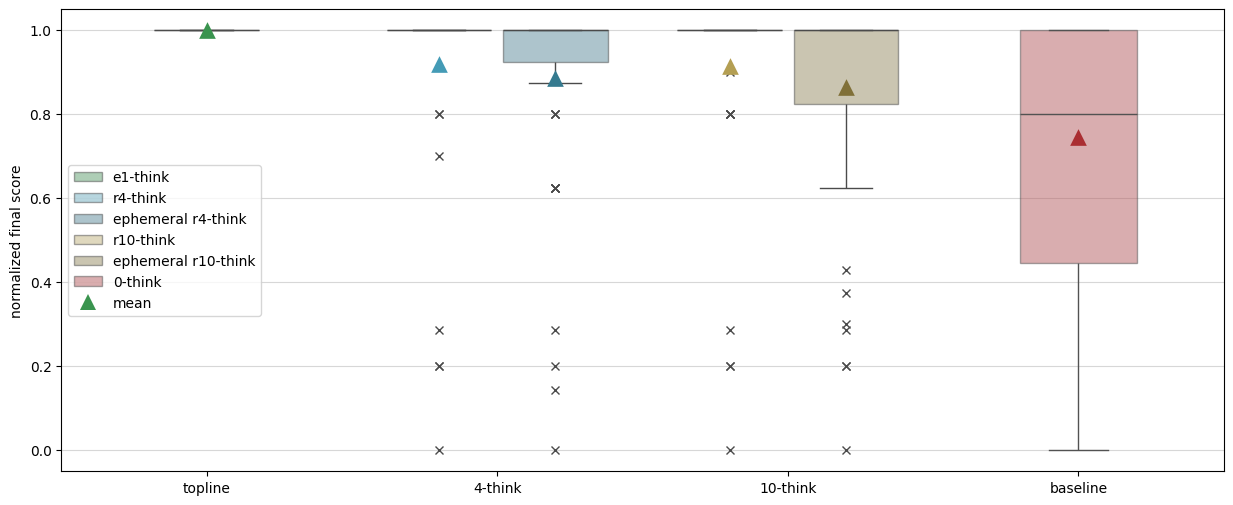

In [13]:
fig, ax = plt.subplots(figsize=figsize)

data_combined = []
for array in final_arrays["simple"]:
    data_combined = np.concatenate((data_combined, array))
array_length = len(final_arrays["simple"][0])

# only for referencep
grouping_labels = ["baseline", "topline", "4-think", "10-think"]
subgrouping_labels = ["0-think", "e1-think", "r4-think", "er4-think", "r10-think", "er10-think"]

grouping = ["topline"]*array_length + ["r4-think"]*array_length*2 + ["r10-think"]*array_length*2 + ["baseline"]*array_length
subgrouping = (["e1-think"] * array_length + ["r4-think"] * array_length + ["ephemeral r4-think"] * array_length + \
               ["r10-think"] * array_length + ["ephemeral r10-think"] * array_length + ["0-think"] * array_length) * 1

grouping_mean_median = ["topline", "r4-think", "r4-think", "r10-think", "r10-think", "baseline"]
subgrouping_mean = ["mean", "_", "__", "___", "____", "_____"]
subgrouping_median = ["median", "_", "__", "___", "____", "_____"]

# swarm = sns.swarmplot(
#     x=grouping, hue=subgrouping, y=data_combined,
#     dodge=True,
#     ax=ax,
#     palette=custom_palette1,
#     size=3,
#     legend=False
# )

# topline
box = sns.boxplot(x=["topline"]*array_length, hue=["e1-think"]*array_length, y=data_combined[:array_length],
                  boxprops={"alpha": 0.5},
                  showfliers=True,
                  flierprops={"marker": "x"},
                  palette=sns.set_palette(['#55a868']),
                  #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
                  legend=True,
                  width=0.4,
                  gap=0.1
                  )
# 4
box = sns.boxplot(x=["4-think"]*array_length*2, hue=["r4-think"] * array_length + ["ephemeral r4-think"] * array_length, y=data_combined[array_length:(array_length*3)],
                  boxprops={"alpha": 0.5},
                  showfliers=True,
                  flierprops={"marker": "x"},
                  palette=sns.set_palette([ '#64b5cd', "#5191a5"]),
                  #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
                  legend=True,
                  gap=0.1
                  )
# 10
box = sns.boxplot(x=["10-think"]*array_length*2, hue=["r10-think"] * array_length + ["ephemeral r10-think"] * array_length, y=data_combined[(array_length*3):(array_length*5)],
                  boxprops={"alpha": 0.5},
                  showfliers=True,
                  flierprops={"marker": "x"},
                  palette=sns.set_palette(['#ccb974', "#a0915b"]),
                  #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
                  legend=True,
                  gap=0.1
                  )
#baseline
box = sns.boxplot(x=["baseline"]*array_length, hue=["0-think"] * array_length, y=data_combined[(array_length*5):],
                  boxprops={"alpha": 0.5},
                  showfliers=True,
                  flierprops={"marker": "x"},
                  palette=sns.set_palette(['#c44e52']),
                  #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
                  legend=True,
                  width=0.4
                  )

# medianplot = sns.swarmplot(x=grouping_mean_median, hue=subgrouping_median, y=medians_simple,
#                          legend=True,
#                          palette=custom_palette1,
#                          marker="X",
#                          size=10
#                          )

meanplot = sns.swarmplot(x=["topline"], hue=["mean"], y=means_simple[:1],
                         legend=True,
                         palette=sns.set_palette(["#3a944f"]),
                         marker="^",
                         size=12,
                         dodge=True
                         )
meanplot = sns.swarmplot(x=["4-think"]*2, hue=["r4-think"] + ["ephemeral r4-think"], y=means_simple[1:3],
                         legend=False,
                         palette=sns.set_palette([ "#449bb6", "#357a8f"]),
                         marker="^",
                         size=12,
                         dodge=True
                         )
meanplot = sns.swarmplot(x=["10-think"]*2, hue=["r10-think"] + ["ephemeral r10-think"], y=means_simple[3:5],
                         legend=False,
                         palette=sns.set_palette(["#b49f53", "#807038"]),
                         marker="^",
                         size=12,
                         dodge=True
                         )
meanplot = sns.swarmplot(x=["baseline"], hue=["0-think"], y=means_simple[5:],
                         legend=False,
                         palette=sns.set_palette(["#aa2e32"]),
                         marker="^",
                         size=12,
                         dodge=True
                         )

# # topline
# violin1 = sns.violinplot(x=["topline"]*array_length, hue=["ephemeral 1-think"]*array_length, y=data_combined[:array_length],
#                   palette=sns.set_palette(['#55a868']),
#                   #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
#                   legend=True,
#                   bw_method=0.5,
#                   cut=0,
#                   alpha=0.5,
#                   width=0.5
#                   )
# # 4
# violin2 = sns.violinplot(x=["4-think"]*array_length*2, hue=["r4-think"] * array_length + ["ephemeral r4-think"] * array_length, y=data_combined[array_length:(array_length*3)],
#                   palette=sns.set_palette([ '#64b5cd', "#437585"]),
#                   #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
#                   legend=True,
#                   bw_method=0.5,
#                   cut=0,
#                   alpha=0.5,
#                   split=True
#                   )
# # 10
# violin3 = sns.violinplot(x=["10-think"]*array_length*2, hue=["r10-think"] * array_length + ["ephemeral r10-think"] * array_length, y=data_combined[(array_length*3):(array_length*5)],
#                   palette=sns.set_palette(['#ccb974', "#7c714a"]),
#                   #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
#                   legend=True,
#                   bw_method=0.5,
#                   cut=0,
#                   alpha=0.5,
#                   split=True
#                   )
# #baseline
# violin4 = sns.violinplot(x=["baseline"]*array_length, hue=["0-think"] * array_length, y=data_combined[(array_length*5):],
#                   palette=sns.set_palette(['#c44e52']),
#                   #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
#                   legend=True,
#                   bw_method=0.5,
#                   cut=0,
#                   alpha=0.5,
#                   width=0.5
#                   )

# ax.set_title(f"Score comparison between fixed and random $n$-think")
ax.grid(axis="y", alpha=0.5)
# ax.set_ylabel("execution time [s]")
ax.set_ylabel("normalized final score")
#ax.semilogy()
plt.show()

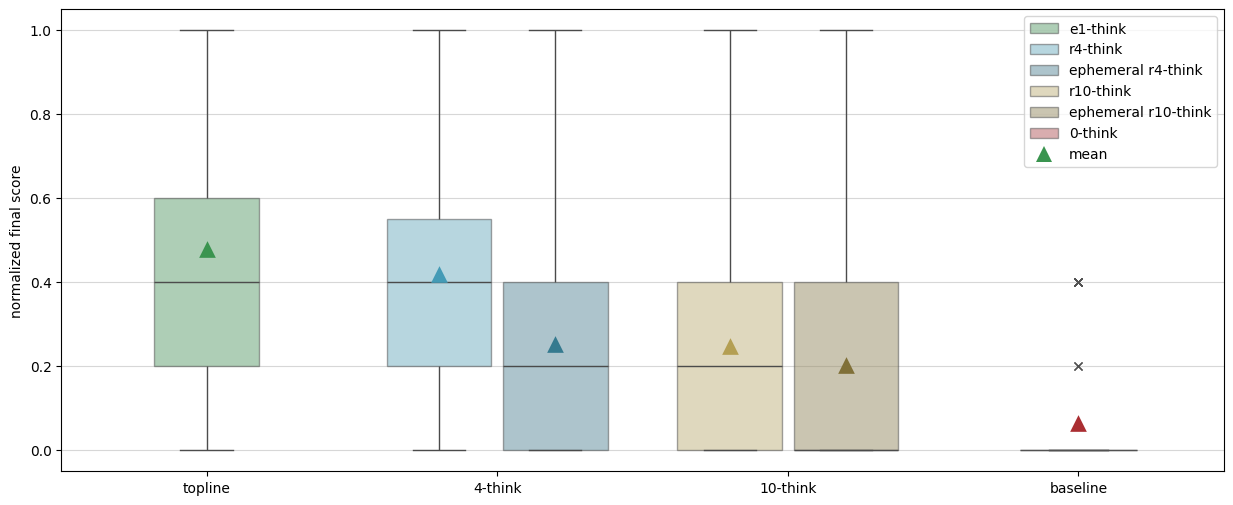

In [14]:
fig, ax = plt.subplots(figsize=figsize)

data_combined = []
for array in final_arrays["cooking"]:
    data_combined = np.concatenate((data_combined, array))
array_length = len(final_arrays["cooking"][0])

# only for referencep
grouping_labels = ["baseline", "topline", "4-think", "10-think"]
subgrouping_labels = ["0-think", "e1-think", "r4-think", "er4-think", "r10-think", "er10-think"]

grouping = ["topline"]*array_length + ["r4-think"]*array_length*2 + ["r10-think"]*array_length*2 + ["baseline"]*array_length
subgrouping = (["e1-think"] * array_length + ["r4-think"] * array_length + ["ephemeral r4-think"] * array_length + \
               ["r10-think"] * array_length + ["ephemeral r10-think"] * array_length + ["0-think"] * array_length) * 1

grouping_mean_median = ["topline", "r4-think", "r4-think", "r10-think", "r10-think", "baseline"]
subgrouping_mean = ["mean", "_", "__", "___", "____", "_____"]
subgrouping_median = ["median", "_", "__", "___", "____", "_____"]

# swarm = sns.swarmplot(
#     x=grouping, hue=subgrouping, y=data_combined,
#     dodge=True,
#     ax=ax,
#     palette=custom_palette1,
#     size=3,
#     legend=False
# )

# topline
box = sns.boxplot(x=["topline"]*array_length, hue=["e1-think"]*array_length, y=data_combined[:array_length],
                  boxprops={"alpha": 0.5},
                  showfliers=True,
                  flierprops={"marker": "x"},
                  palette=sns.set_palette(['#55a868']),
                  #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
                  legend=True,
                  width=0.4,
                  gap=0.1
                  )
# 4
box = sns.boxplot(x=["4-think"]*array_length*2, hue=["r4-think"] * array_length + ["ephemeral r4-think"] * array_length, y=data_combined[array_length:(array_length*3)],
                  boxprops={"alpha": 0.5},
                  showfliers=True,
                  flierprops={"marker": "x"},
                  palette=sns.set_palette([ '#64b5cd', "#5191a5"]),
                  #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
                  legend=True,
                  gap=0.1
                  )
# 10
box = sns.boxplot(x=["10-think"]*array_length*2, hue=["r10-think"] * array_length + ["ephemeral r10-think"] * array_length, y=data_combined[(array_length*3):(array_length*5)],
                  boxprops={"alpha": 0.5},
                  showfliers=True,
                  flierprops={"marker": "x"},
                  palette=sns.set_palette(['#ccb974', "#a0915b"]),
                  #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
                  legend=True,
                  gap=0.1
                  )
#baseline
box = sns.boxplot(x=["baseline"]*array_length, hue=["0-think"] * array_length, y=data_combined[(array_length*5):],
                  boxprops={"alpha": 0.5},
                  showfliers=True,
                  flierprops={"marker": "x"},
                  palette=sns.set_palette(['#c44e52']),
                  #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
                  legend=True,
                  width=0.4
                  )

# medianplot = sns.swarmplot(x=grouping_mean_median, hue=subgrouping_median, y=medians_cooking,
#                          legend=True,
#                          palette=custom_palette1,
#                          marker="X",
#                          size=10
#                          )

meanplot = sns.swarmplot(x=["topline"], hue=["mean"], y=means_cooking[:1],
                         legend=True,
                         palette=sns.set_palette(["#3a944f"]),
                         marker="^",
                         size=12,
                         dodge=True
                         )
meanplot = sns.swarmplot(x=["4-think"]*2, hue=["r4-think"] + ["ephemeral r4-think"], y=means_cooking[1:3],
                         legend=False,
                         palette=sns.set_palette([ "#449bb6", "#357a8f"]),
                         marker="^",
                         size=12,
                         dodge=True
                         )
meanplot = sns.swarmplot(x=["10-think"]*2, hue=["r10-think"] + ["ephemeral r10-think"], y=means_cooking[3:5],
                         legend=False,
                         palette=sns.set_palette(["#b49f53", "#807038"]),
                         marker="^",
                         size=12,
                         dodge=True
                         )
meanplot = sns.swarmplot(x=["baseline"], hue=["0-think"], y=means_cooking[5:],
                         legend=False,
                         palette=sns.set_palette(["#aa2e32"]),
                         marker="^",
                         size=12,
                         dodge=True
                         )

# # topline
# violin1 = sns.violinplot(x=["topline"]*array_length, hue=["ephemeral 1-think"]*array_length, y=data_combined[:array_length],
#                   palette=sns.set_palette(['#55a868']),
#                   #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
#                   legend=True,
#                   bw_method=0.5,
#                   cut=0,
#                   alpha=0.5,
#                   width=0.5
#                   )
# # 4
# violin2 = sns.violinplot(x=["4-think"]*array_length*2, hue=["r4-think"] * array_length + ["ephemeral r4-think"] * array_length, y=data_combined[array_length:(array_length*3)],
#                   palette=sns.set_palette([ '#64b5cd', "#437585"]),
#                   #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
#                   legend=True,
#                   bw_method=0.5,
#                   cut=0,
#                   alpha=0.5,
#                   split=True
#                   )
# # 10
# violin3 = sns.violinplot(x=["10-think"]*array_length*2, hue=["r10-think"] * array_length + ["ephemeral r10-think"] * array_length, y=data_combined[(array_length*3):(array_length*5)],
#                   palette=sns.set_palette(['#ccb974', "#7c714a"]),
#                   #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
#                   legend=True,
#                   bw_method=0.5,
#                   cut=0,
#                   alpha=0.5,
#                   split=True
#                   )
# #baseline
# violin4 = sns.violinplot(x=["baseline"]*array_length, hue=["0-think"] * array_length, y=data_combined[(array_length*5):],
#                   palette=sns.set_palette(['#c44e52']),
#                   #medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
#                   legend=True,
#                   bw_method=0.5,
#                   cut=0,
#                   alpha=0.5,
#                   width=0.5
#                   )

# ax.set_title(f"Score comparison between fixed and random $n$-think")
ax.grid(axis="y", alpha=0.5)
# ax.set_ylabel("execution time [s]")
ax.set_ylabel("normalized final score")
#ax.semilogy()
plt.show()

In [15]:
print(means_cooking)

[np.float64(0.48), np.float64(0.42), np.float64(0.252), np.float64(0.248), np.float64(0.20400000000000001), np.float64(0.064)]


In [18]:
print(means_cooking)

[np.float64(175.87551493368406), np.float64(69.45475811175199), np.float64(37.85032804928807), np.float64(46.241875067324145), np.float64(33.85598031507596), np.float64(6.3090457175519985)]


In [19]:
print(69.45475811175199/175.87551493368406)

0.39490862692251805


In [20]:
print(0.42/0.48)

0.875
